In [ ]:
import pandas as pd 
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import seaborn

%matplotlib inline

#Data recuperation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/CreditcardSVM/creditcard.csv') # Đọc file csv
df = pd.DataFrame(data)

Mounted at /content/drive


#Data Visualization

In [ ]:
df.describe() # Mô tả các chỉ số thống kê (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile, Maximum)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


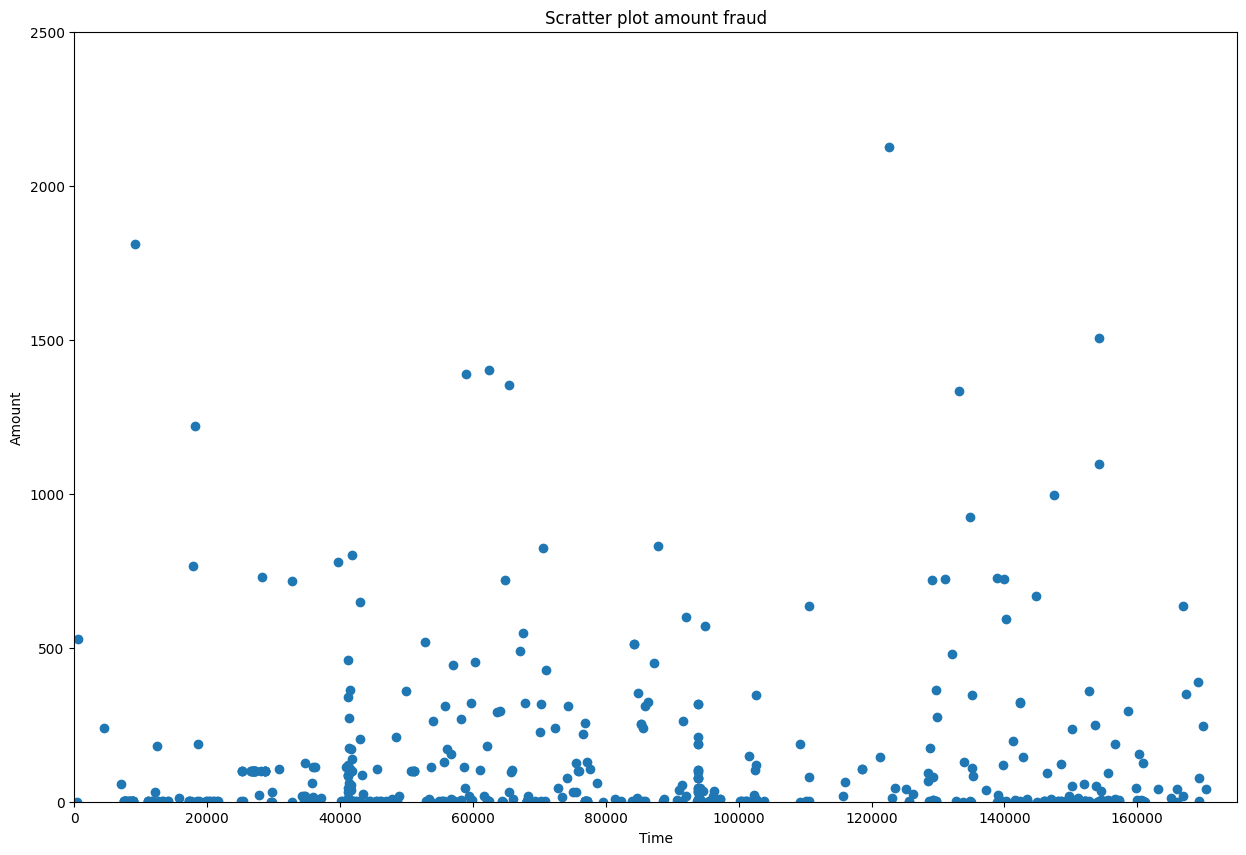

In [ ]:
df_fraud = df[df['Class'] == 1] # fraud data trong dataset: các giao dịch bị gian lận
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Hiển thị số tiền gian lận theo thời gian
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

Nhận xét:
1.   Thời gian không ảnh hưởng đến tần suất gian lận
2.   Phần lớn các vụ lừa đảo là số tiền nhỏ.

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


#Dữ liệu không cân bằng

In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


Vì dataset này không cân bằng (492 frauds VS 284315 no frauds) nên rất có thể nó sẽ gán nhãn mọi giao dịch là no frauds.

In [ ]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


Để giải quyết vấn đề, ta có thể sử dụng nguyên tắc undersampling hoặc oversampling. Chỉ nên sử dụng undersampling nếu chúng ta có thể chắc rằng một vài bộ no fraud được chọn đại diện cho toàn bộ giao dịch no fraud của dataset

#Mối tương quan giữa các features

In [ ]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

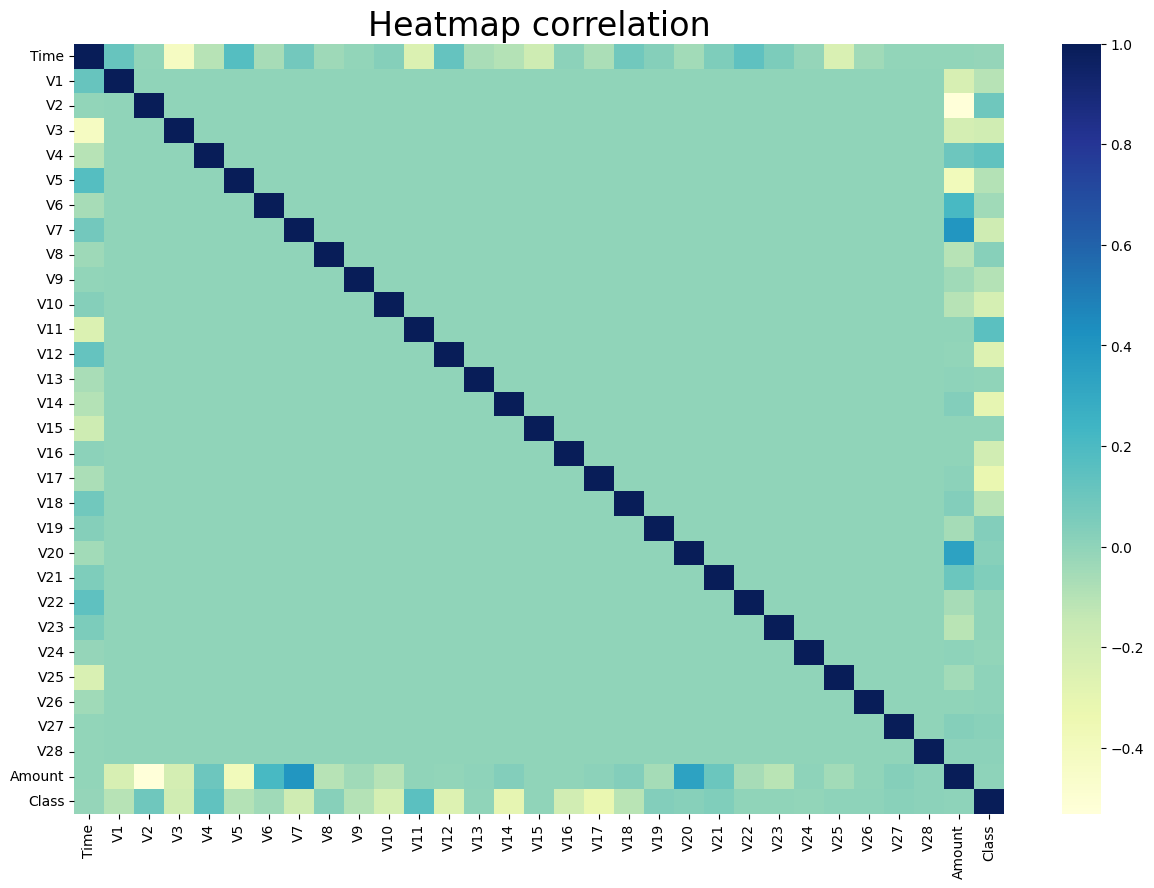

In [ ]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu")
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

Theo hình mô tả trên, ta có thể thấy hầu hết các tính năng không tương quan với nhau. Điều này chứng minh thực tế là một PCA đã được thực hiện trước đó trên tập dữ liệu.


Điều thường được thực hiện trên một tập dữ liệu lớn là giảm kích thước. Bằng cách chọn các kích thước quan trọng nhất, có khả năng giải thích hầu hết vấn đề, do đó tiết kiệm được một lượng thời gian đáng kể đồng thời ngăn ngừa độ chính xác giảm quá nhiều.

Tuy nhiên, trong trường hợp này do PCA đã được thực hiện trước đó, nếu việc giảm kích thước có hiệu quả thì PCA không được tính toán theo cách hiệu quả nhất. Một cách khác để nói là không nên tính toán giảm kích thước trên tập dữ liệu mà PCA đã được tính toán chính xác.

In [ ]:
rank = df_corr['Class'] # Truy xuất các hệ số tương quan trên mỗi tính năng liên quan đến lớp tính năng
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Xếp giá trị tuyệt đối của các hệ số theo thứ tự giảm dần
df_rank.dropna(inplace=True) # Loại bỏ các dữ liệu bị thiếu (các dữ liệu không phải số)

#Data Selection

UNDERSAMPLING

In [ ]:
# Tách dữ liệu thành hai nhóm: tập train và tập test

# Tạo tập train
df_train_all = df[0:150000] # Cắt thành 2 dữ liệu gốc
# Tách dữ liệu fraud và no fraud
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) 
df_train = df_train.sample(frac=1) 

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


<ipython-input-12-039d2ca1c836>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_1.append(df_sample)


In [ ]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # Loại bỏ features Time (useless), Class (label)
y_train = df_train['Class'] # Tạo label mới
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
# xét tất cả test dataset xem mô hình có đang học đúng không
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

Sau đó,ta xác định tập train và tập test sau khi áp dụng giảm kích thước để minh họa thực tế là sẽ không thu được gì vì PCA đã được tính toán trước đó.

In [ ]:
X_train_rank = df_train[df_rank.index[1:11]] # Lấy 10 features ranked đầu tiên
X_train_rank = np.asarray(X_train_rank)

In [ ]:
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

#Confusion Matrix

In [ ]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [ ]:
# Hàm để vẽ confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Model Selection

Ta sử dụng SVM model classifier, với thư viện scikit-learn

In [ ]:
# Khởi tạo model SVM với kernel tuyến tính
classifier = svm.SVC(kernel='linear') 

In [ ]:
# Huấn luyện mô hình
classifier.fit(X_train, y_train) 

SVC(kernel='linear')

#Testing the model

In [ ]:
prediction_SVM_all = classifier.predict(X_test_all) #Dự đoán tập test

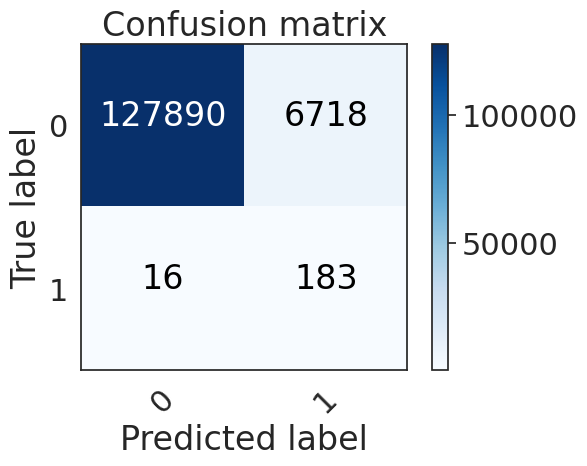

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

Theo đồ thị, ta có: 

1. True Negative (TN) - Số lượng giao dịch bình thường (negative class) được phân loại chính xác là bình thường: cm[0][0] = **127890**
2. False Positive (FP): Số lượng giao dịch bình thường (negative class) bị phân loại sai thành giao dịch gian lận (positive class): cm[0][1] = **6718**
3. False Negative (FN): Số lượng giao dịch gian lận (positive class) bị phân loại sai thành giao dịch bình thường (negative class): cm[1][0] = **16**
4. True Positive (TP): Số lượng giao dịch gian lận (positive class) được phân loại chính xác là gian lận.: cm[1][1] = **183**

Trong trường hợp này, ta sẽ cố gắng giảm thiểu số lỗi trong kết quả dự đoán. Lỗi nằm trên đường chéo của confusion matrix. 

Tiêu chí ta đưa ra là độ chính xác của real fraud sẽ gấp 4 lần so với độ chính xác chung

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9256878128355694


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 183 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9195979899497487
the accuracy is : 0.9500471043788528


#Models Rank

Cần phải tính toán lại phương thức phù hợp, vì thứ nguyên của các bộ dữ liệu để dự đoán đã tăng từ 29 thành 10 do giảm kích thước

In [ ]:
classifier.fit(X_train_rank, y_train)
prediction_SVM = classifier.predict(X_test_all_rank)

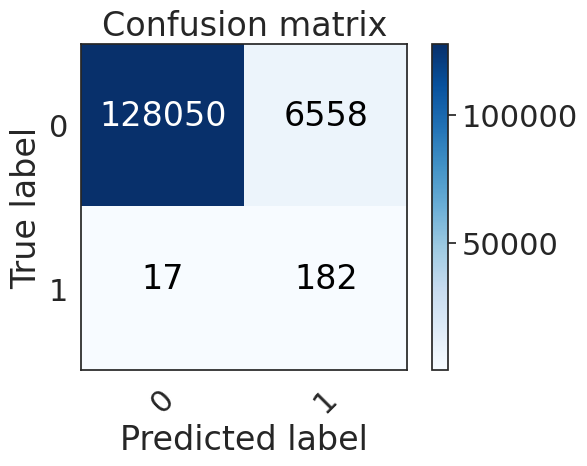

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9219036051279416


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 182 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.914572864321608
the accuracy is : 0.9512265683532755


#Re-balanced class weigh

Trong mô hình SVM được sử dụng trước đây này, trọng số của mỗi loại là như nhau, điều đó có nghĩa là việc bỏ sót một gian lận cũng tệ như đánh giá sai một người không gian lận. Mục tiêu, đối với một ngân hàng, là tối đa hóa số vụ gian lận được phát hiện. Ngay cả khi điều đó có nghĩa là coi nhiều bộ dữ liệu không gian lận hơn là hoạt động gian lận. Vì vậy, ta cần giảm thiểu các kết quả dương tính giả : số lần gian lận không được phát hiện.

 Sửa đổi tham số class_weight, ta có thể chọn lớp nào cần xem xét hơn trong giai đoạn đào tạo. Trong trường hợp này, class_1 mô tả các hoạt động gian lận sẽ được coi là quan trọng hơn class_0 (hoạt động không gian lận). Tuy nhiên, trong trường hợp này, ta nên xem xét class_0 hơn do số lượng lớn hoạt động không gian lận bị phân loại sai. Tất nhiên, mục tiêu là để mất càng ít gian lận hiệu quả càng tốt trong quá trình này.

In [ ]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [ ]:
classifier_b.fit(X_train, y_train) 

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

#Testing the model

In [ ]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) 

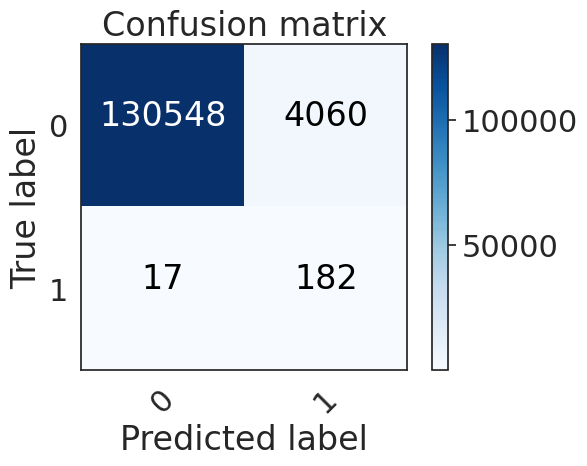

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9256096441318509


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 182 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.914572864321608
the accuracy is : 0.9697567633728219


#Models Rank

In [ ]:
classifier_b.fit(X_train_rank, y_train) 
prediction_SVM = classifier_b.predict(X_test_all_rank) 

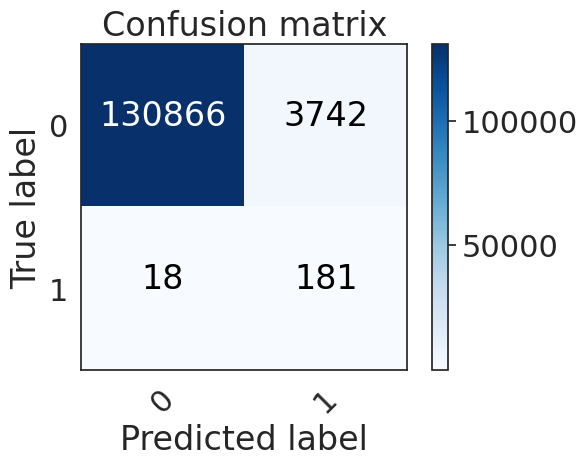

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9220598456166238


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 181 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9095477386934674
the accuracy is : 0.9721082733092495
